In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
xls_file = pd.ExcelFile("Data_monthly_final.xlsx") # Read Excel
df1=xls_file.parse("Gasoil") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.describe()

,LGOc1,LGOc3,LGOc6,LGOc9,LGOc12
count,415.000000,415.000000,415.000000,415.000000,358.000000
mean,443.368675,441.331928,440.084337,439.361157,482.122207
std,292.224335,288.605805,285.924459,284.277162,281.469537
min,94.500000,99.250000,105.250000,112.000000,117.750000
25%,177.625000,175.375000,175.875000,174.500000,192.875000
50%,370.250000,374.000000,384.500000,390.250000,495.750000
75%,626.375000,635.125000,644.375000,640.000000,678.187500
max,1262.500000,1277.250000,1299.750000,1302.500000,1289.000000


<AxesSubplot:xlabel='Timestamp'>

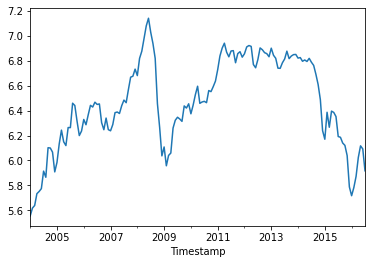

In [3]:
spot = df1["LGOc1"]
#spot = np.log(spot)
spot = spot.loc['2004-01-31':'2022-11-30']
spot_train = spot.loc[:'2016-07-31']
spot_train.plot()

In [4]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot_train.describe()
#spot.dropna().describe()

count    151.000000
mean       6.463176
std        0.358866
min        5.554896
25%        6.238325
50%        6.454412
75%        6.815365
max        7.140849
Name: LGOc1, dtype: float64

In [5]:
print("Skewness spot:", scipy.stats.skew(spot_train.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot_train.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot_train.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot_train.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot_train.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot_train.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot_train.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot_train.dropna()), lags=[6]))

Skewness spot: -0.3860894639921177
Skewness logs: -0.4894899553105847
Kurtosis spot: 2.338353274792951
Kurtosis logs: 2.4989417257210262
JB spot: Jarque_beraResult(statistic=6.50581414815893, pvalue=0.03866165202049143)
JB logs: Jarque_beraResult(statistic=7.60952583346299, pvalue=0.022264475074902812)
Q(6) spot:       lb_stat      lb_pvalue
6  547.733737  4.348614e-115
Q(6) logs:       lb_stat      lb_pvalue
6  540.988147  1.237123e-113


In [6]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot_train.dropna()))
print("ADF logs:", adfuller(np.log(spot_train.dropna())))

print("PP spot:", PhillipsPerron(spot_train.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot_train.dropna())).summary().as_text())



ADF spot: (-2.5945943039505095, 0.09411966982093789, 2, 148, {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}, -269.8613899758993)
ADF logs: (-2.6422027029143016, 0.08458468992884544, 2, 148, {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}, -773.3349723787401)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.480
P-value                         0.120
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.572
P-value                         0.099
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The proc

In [7]:

print("KPSS spot:", KPSS(spot_train.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot_train.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.452
P-value                         0.053
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                  0.453
P-value                         0.053
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


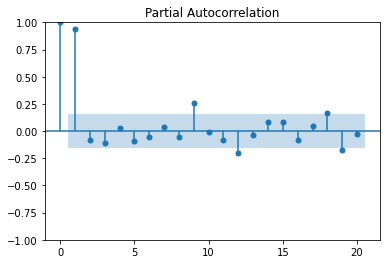

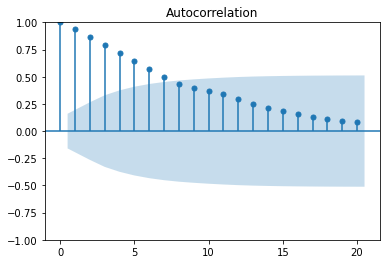

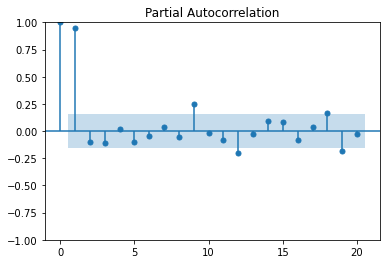

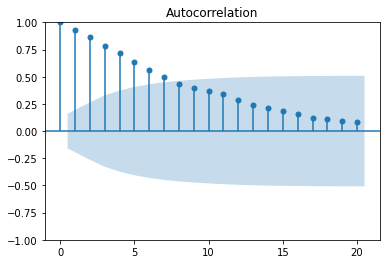

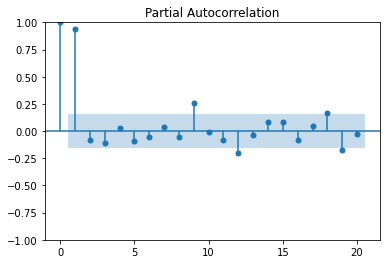

In [8]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot_train.dropna(), lags = 20)
plot_pacf(spot_train.dropna(), lags = 20)


print("ACF and PACF logs:")
plot_acf(np.log(spot_train.dropna()), lags = 20)
plot_pacf(np.log(spot_train.dropna()), lags = 20)



0.6782943507735172

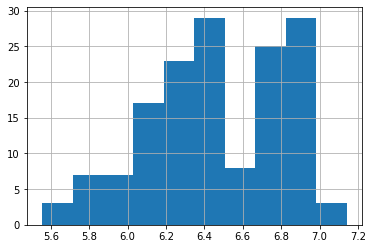

In [9]:
spot_train.hist()
0.6782943507735172

<AxesSubplot:>

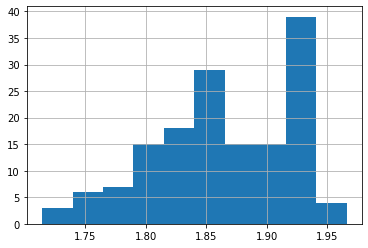

In [10]:
np.log(spot_train).hist()

In [11]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=(spot_train.shape[0]))
#train, test = model_selection.train_test_split(data, train_size=(spot.shape[0]-1))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-286.847, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-282.858, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-288.103, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-286.252, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-284.757, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-287.746, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-286.790, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-281.452, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-290.050, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-289.708, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-288.751, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-288.393, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-284.041, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.394 seconds


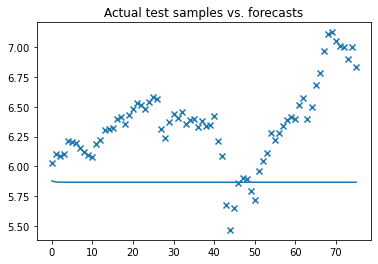

In [12]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [21]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -818.602
Date:                Sat, 31 Dec 2022   AIC                           1641.203
Time:                        11:10:35   BIC                           1647.225
Sample:                             0   HQIC                          1643.650
                                - 151                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2877      0.074      3.902      0.000       0.143       0.432
sigma2      3232.7231    301.098     10.736      0.000    2642.582    3822.864
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                26.27
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.64
Prob(H) (two-sided):                  0.83   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

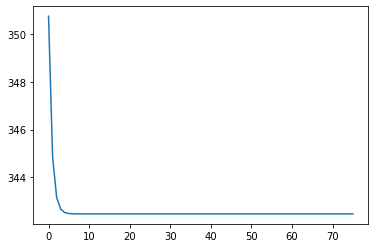

In [22]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [23]:
arima.predict(n_periods=test.shape[0])

array([350.74999033, 344.85173915, 343.15469767, 342.66642585,
       342.52594056, 342.48552021, 342.47389049, 342.47054439,
       342.46958166, 342.46930466, 342.46922496, 342.46920203,
       342.46919543, 342.46919353, 342.46919299, 342.46919283,
       342.46919279, 342.46919277, 342.46919277, 342.46919277,
       342.46919277, 342.46919277, 342.46919277, 342.46919277,
       342.46919277, 342.46919277, 342.46919277, 342.46919277,
       342.46919277, 342.46919277, 342.46919277, 342.46919277,
       342.46919277, 342.46919277, 342.46919277, 342.46919277,
       342.46919277, 342.46919277, 342.46919277, 342.46919277,
       342.46919277, 342.46919277, 342.46919277, 342.46919277,
       342.46919277, 342.46919277, 342.46919277, 342.46919277,
       342.46919277, 342.46919277, 342.46919277, 342.46919277,
       342.46919277, 342.46919277, 342.46919277, 342.46919277,
       342.46919277, 342.46919277, 342.46919277, 342.46919277,
       342.46919277, 342.46919277, 342.46919277, 342.46

<AxesSubplot:xlabel='Timestamp'>

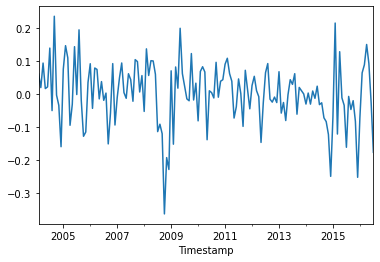

In [24]:
spot2 = np.log(spot).diff()
#spot2 = spot.diff()
spot_train2 = spot2.loc[:'2016-07-31'].dropna()
spot_train2.plot()


In [25]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot_train2.describe()
#spot.dropna().describe()

count    150.000000
mean       0.002413
std        0.093314
min       -0.362393
25%       -0.041174
50%        0.004014
75%        0.064726
max        0.236949
Name: LGOc1, dtype: float64

In [26]:
print("Skewness spot:", scipy.stats.skew(spot_train2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot_train2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot_train2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot_train2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.5911732191425311
Kurtosis spot: 4.344731951199348
JB spot: Jarque_beraResult(statistic=20.039044504386112, pvalue=4.452221623241215e-05)
Q(6) spot:      lb_stat  lb_pvalue
6  11.674169   0.069645


In [27]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot_train2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot_train2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-9.579315030281256, 2.1799975345363345e-16, 0, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, -267.25674494126)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -9.424
P-value                         0.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [28]:
print("KPSS spot:", KPSS(spot_train2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.348
P-value                         0.099
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


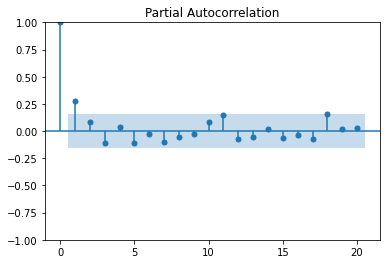

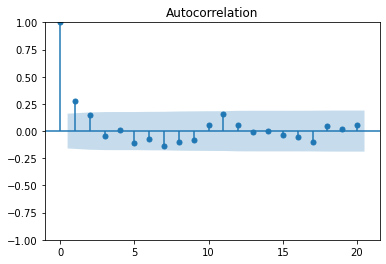

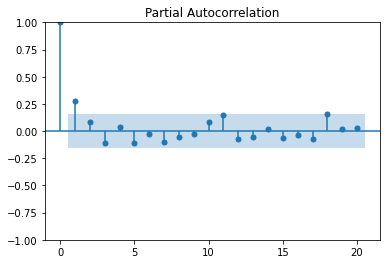

In [26]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot_train2.dropna(), lags = 20)
plot_pacf(spot_train2.dropna(), lags = 20)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

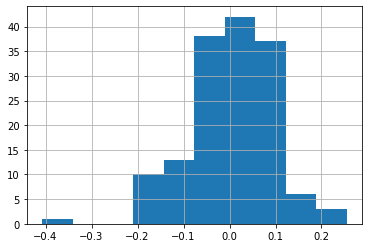

In [27]:
spot_train2.hist()


In [28]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=(spot_train2.shape[0]))

In [29]:
train2

array([ 9.94141527e-02, -2.25927401e-02,  9.00744900e-02,  5.91221972e-02,
       -5.85423189e-02,  1.48669849e-01, -1.05475614e-02,  1.57786720e-01,
        5.45437197e-02, -7.34799695e-02, -1.17618250e-01,  1.26586920e-01,
        8.63215340e-02,  8.11177619e-02, -6.07512646e-02, -7.07133176e-03,
        9.13059727e-02,  6.59656240e-02,  1.21202034e-01, -5.42661867e-02,
       -8.85592318e-02, -5.39238007e-02,  6.89565402e-02,  1.12304812e-01,
       -6.62473097e-02,  6.50342693e-02,  9.52963868e-02, -2.92512633e-02,
        4.30861529e-02,  2.20646648e-02, -6.74258080e-02, -1.17213803e-01,
       -5.68007163e-02,  8.48915644e-02, -5.43612092e-02, -5.85318411e-02,
        7.53143124e-02,  9.56185974e-02, -6.62985854e-03,  5.74841291e-03,
        4.83421480e-02,  7.60166462e-02, -5.82507383e-02,  8.53936157e-02,
        1.35187845e-01, -2.64982802e-02,  6.14107592e-02, -1.76291785e-02,
        8.21011018e-02,  1.99600865e-03,  1.04602502e-01,  1.37541839e-01,
        9.01173639e-02, -

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-296.359, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-288.825, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-298.902, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-296.306, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-297.814, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-297.394, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-287.640, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-296.957, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.239 seconds


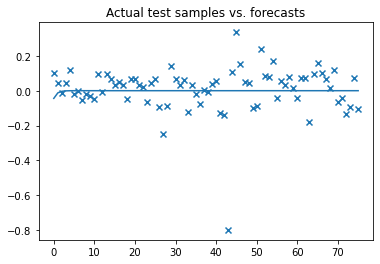

In [30]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [31]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 151.451
Date:                Sat, 31 Dec 2022   AIC                           -298.902
Time:                        08:55:51   BIC                           -292.881
Sample:                             0   HQIC                          -296.456
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2807      0.075      3.757      0.000       0.134       0.427
sigma2         0.0078      0.001     10.617      0.000       0.006       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                14.59
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.37
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

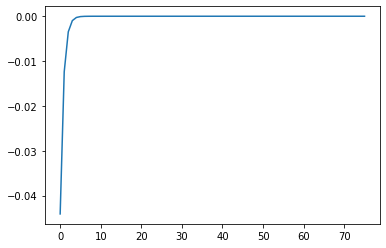

In [32]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [33]:
tests = arima2.predict(n_periods=test2.shape[0])
tests

array([-4.40798827e-02, -1.23728750e-02, -3.47296832e-03, -9.74834783e-04,
       -2.73628426e-04, -7.68053385e-05, -2.15586520e-05, -6.05134339e-06,
       -1.69856431e-06, -4.76773589e-07, -1.33826582e-07, -3.75640647e-08,
       -1.05439363e-08, -2.95959967e-09, -8.30736259e-10, -2.33181108e-10,
       -6.54520958e-11, -1.83718864e-11, -5.15684346e-12, -1.44748524e-12,
       -4.06297677e-13, -1.14044550e-13, -3.20114045e-14, -8.98534848e-15,
       -2.52211637e-15, -7.07938149e-16, -1.98712648e-16, -5.57770713e-17,
       -1.56561835e-17, -4.39456707e-18, -1.23352028e-18, -3.46239401e-19,
       -9.71866660e-20, -2.72795297e-20, -7.65714859e-21, -2.14930114e-21,
       -6.03291860e-22, -1.69339261e-22, -4.75321935e-23, -1.33419114e-23,
       -3.74496917e-24, -1.05118328e-24, -2.95058845e-25, -8.28206879e-26,
       -2.32471131e-26, -6.52528108e-27, -1.83159487e-27, -5.14114218e-28,
       -1.44307802e-28, -4.05060604e-29, -1.13697313e-29, -3.19139380e-30,
       -8.95799039e-31, -

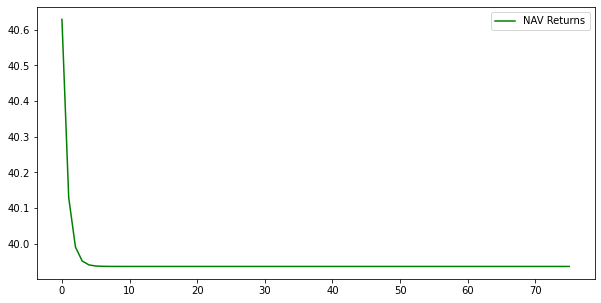

In [34]:
cum_res = np.exp(tests.cumsum())*spot.iloc[spot_train.shape[0]-1]
#cum_res = tests.cumsum()+spot.iloc[spot_train.shape[0]-1]
plt.figure(figsize=(10,5))
plt.plot(cum_res, color='g',label = 'NAV Returns')
plt.legend()
plt.show()

In [35]:
cum_res

array([40.62901935, 40.12941869, 39.99029222, 39.95132729, 39.94039697,
       39.93732945, 39.93646846, 39.93622679, 39.93615896, 39.93613992,
       39.93613458, 39.93613307, 39.93613265, 39.93613254, 39.9361325 ,
       39.93613249, 39.93613249, 39.93613249, 39.93613249, 39.93613249,
       39.93613249, 39.93613249, 39.93613249, 39.93613249, 39.93613249,
       39.93613249, 39.93613249, 39.93613249, 39.93613249, 39.93613249,
       39.93613249, 39.93613249, 39.93613249, 39.93613249, 39.93613249,
       39.93613249, 39.93613249, 39.93613249, 39.93613249, 39.93613249,
       39.93613249, 39.93613249, 39.93613249, 39.93613249, 39.93613249,
       39.93613249, 39.93613249, 39.93613249, 39.93613249, 39.93613249,
       39.93613249, 39.93613249, 39.93613249, 39.93613249, 39.93613249,
       39.93613249, 39.93613249, 39.93613249, 39.93613249, 39.93613249,
       39.93613249, 39.93613249, 39.93613249, 39.93613249, 39.93613249,
       39.93613249, 39.93613249, 39.93613249, 39.93613249, 39.93

In [36]:
#cointegration tests

#normalized cv
#LR test

In [37]:
#correlaatiomatriisi

In [38]:
#np.argwhere(np.isnan(x))